In [135]:
import numpy as np
import pandas as pd
import csv
import os
import matplotlib.pyplot as plt
import seaborn as sns
from Bio import SeqIO

plt.style.use("~/.matplotstyle/scientific.mplstyle")

#plt.style.use('default')

### Changing CD-HIT cut off

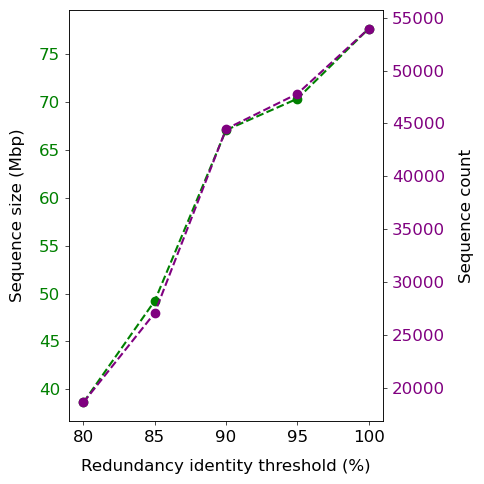

In [13]:
# Line graph for plots to find what changing CD-HIT cutoff does

cutoffs = [80, 85, 90, 95, 100]
# Before:
seqnumber = [18611, 27073, 44472, 47800, 53956]
bp = [38.634184, 49.244752, 67.090389, 70.368815, 77.685275]

# After:
#seqnumber = [3866, 7752, 15923, 17898, 22361]
#bp = [27.330328, 34.871183, 47.482078, 49.325449, 54.193457]

cutoffig, cutoffax = plt.subplots(1,1,figsize=(5, 5))
cutoffax.plot(cutoffs, bp, color = 'green', linestyle='--', marker='o')
cutoffax.tick_params(axis='y', labelcolor='green')
cutoffax.set_ylabel ("Sequence size (Mbp)")
cutoffax2 = cutoffax.twinx()
cutoffax2.plot(cutoffs, seqnumber, color = 'purple', linestyle='--', marker='o')
cutoffax2.tick_params(axis='y', labelcolor='purple')
cutoffax2.set_ylabel ("Sequence count")
cutoffax.set_xlabel ("Redundancy identity threshold (%)")
#plt.savefig('1kGcdhit.svg', format='svg', dpi=1200)
plt.show()

### Contig length histograms

<Figure size 640x480 with 0 Axes>

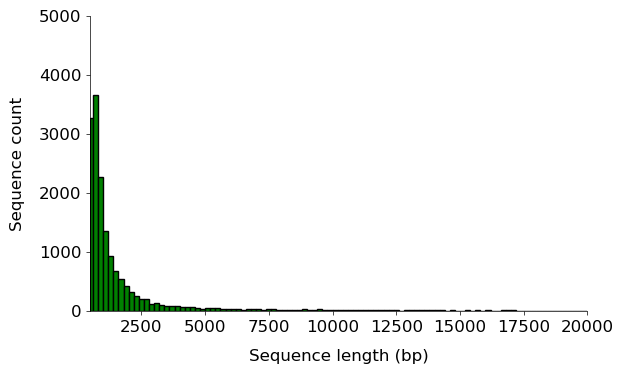

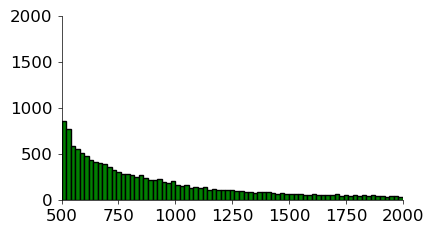

In [133]:
fastaFile = "ContigLengths/RGapgnonred.fasta"
arraybig = []
arraysmall = []
name = "ContigLengths/contigLength.txt"
out = open(name,"w")

if fastaFile.endswith(".fasta"):
    for record in SeqIO.parse(fastaFile, "fasta"):
        seqLength = len(str(record.seq))
        out.write(str(seqLength) + "\n")
        arraybig.append(int(seqLength))
        if int(seqLength) <= 2000:
            arraysmall.append(int(seqLength))

out.close()

csv = pd.read_csv(name,header=None)

# Plot histograms of contig lengths
# But first create bins to put the counts into

numbinbig = [500]
numbinsmall = []
for i in range(600,20200,200):
    numbinbig.append(i)
    
for h in range(500,2020,20):
    numbinsmall.append(h)

# Plot big graph
plt.figure()
abig = np.array(arraybig)
plt.figure(figsize=(6.4, 3.9))
plt.hist(abig, bins = numbinbig, edgecolor = "black", color = "green")
plt.ylabel("Sequence count")
plt.xlabel("Sequence length (bp)")
plt.axis([500, 20000, 0, 5000]) # y axes: for APG, 0-4000, for 1kG before, 0-15000, for 1kG after, 0-3500
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
bigfigname = "ContigLengths/1kGcontigHistbigAfter.svg"
#plt.savefig(bigfigname, format='svg', dpi=1200)

# Plot small graph
plt.figure(figsize=(4.5,2.5))
asmall = np.array(arraysmall)
plt.hist(asmall, bins = numbinsmall, edgecolor = "black", color = "green")
plt.axis([500, 2000, 0, 2000]) # y axes: for APG, 0-6000, for 1kG before, 0-4000, for 1kG after, 0-800
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
smallfigname = "ContigLengths/1kGcontigHistsmall.svg"
#plt.savefig(smallfigname, format='svg', dpi=1200)

### Contamination scatter plots

In [20]:
populations = ["BantuNC/errorRun", "CARF/errorRun/contaminatedpangenome", "CWNC/errorRun", "EANS/errorRun/contaminatedpangenome", "EAAA/errorRun", "FWNC/errorRun", "KhoeSan/errorRun/KhoeSanHGDP/contaminatedpangenome", "KhoeSan/errorRun/KhoeSanSchlebusch/contaminatedpangenome"]
maindir = "/cbio/projects/008/jess/HUPANrun/"
HUPANfilefully = "/10.1_rmctmfully/sequence.orangism.txt"
HUPANfilepartially = "/10.2_rmctmpartially/sequence.orangism.txt"

In [21]:
# For each population, need to make a dict of the counts of contamination per sample

allcontam = {}
for pop in populations:
    popdict = {}
    fully = os.path.join(maindir, pop + HUPANfilefully) # check fully unaligned contam
    with open (fully, 'r') as f:
        for line in f:
            if "microbiology" in line:
                sample = line.split("\t")[0].split(":")[0]
                if sample not in popdict:
                    popdict[sample] = 1
                else:
                    popdict[sample] += 1
    partially = os.path.join(maindir, pop + HUPANfilepartially) # check partially unaligned contam
    with open (partially, 'r') as g:
        for line in g:
            if "microbiology" in line:
                sample = line.split("\t")[0].split(":")[0]
                if sample not in popdict:
                    popdict[sample] = 1
                else:
                    popdict[sample] += 1
    allcontam["%s" %pop] = popdict # saving each population dict into one big dict

# Great, now just merge the KhoeSan dicts:
(allcontam.get("KhoeSan/errorRun/KhoeSanHGDP/contaminatedpangenome")).update(allcontam.get("KhoeSan/errorRun/KhoeSanSchlebusch/contaminatedpangenome"))
del allcontam["KhoeSan/errorRun/KhoeSanSchlebusch/contaminatedpangenome"]

# And rename the other pops:
allcontam["BantuNC"] = allcontam.pop("BantuNC/errorRun")
allcontam["CARF"] = allcontam.pop("CARF/errorRun/contaminatedpangenome")
allcontam["CWNC"] = allcontam.pop("CWNC/errorRun")
allcontam["EAAA"] = allcontam.pop("EAAA/errorRun")
allcontam["EANS"] = allcontam.pop("EANS/errorRun/contaminatedpangenome")
allcontam["FWNC"] = allcontam.pop("FWNC/errorRun")
allcontam["KhoeSan"] = allcontam.pop("KhoeSan/errorRun/KhoeSanHGDP/contaminatedpangenome")
print (allcontam)

{'BantuNC': {'SAMEA2580849': 1, 'LP6005441-DNA_F01': 2, 'NA19467': 1, 'NA19434': 1, 'NA19328': 1, 'LP6005443-DNA_A01': 3, 'NA19372': 1, 'NA19473': 1, 'LP6005443-DNA_E02': 1}, 'CARF': {'LP6005441-DNA_G02': 2, 'SAMEA2580814': 124, 'SAMEA2580808': 455, 'LP6005592-DNA_C03': 2, 'SAMEA3506073': 1, 'SAMEA2580802': 1, 'SAMEA2580807': 1}, 'CWNC': {'CF30': 1, 'CP36': 1, 'CB7': 1, 'CB33': 3, 'CB31': 2}, 'EAAA': {'egpg5305762': 6, 'LP6005442-DNA_D09': 5}, 'EANS': {'LP6005443-DNA_H08': 49048, 'egpg5305793': 1, 'LP6005442-DNA_F09': 1, 'LP6005443-DNA_B09': 55194, 'LP6005443-DNA_F06': 2, 'LP6005443-DNA_E06': 1, 'LP6005677-DNA_G01': 1}, 'FWNC': {'SAMEA2580889': 1, 'LP6005441-DNA_F07': 2, 'PAV0Q': 1, 'LZP0B': 1}, 'KhoeSan': {'SAMEA2580841': 266, 'LP6005443-DNA_G08': 1, 'LP6005592-DNA_C05': 16023, 'LP6005677-DNA_D03': 2966, 'KSP111': 130, 'KSP228': 1, 'KSP116': 5, 'KSP224': 1, 'KSP106': 12, 'KSP105': 30, 'KSP152': 17, 'KSP137': 6, 'KSP103': 2, 'KSP134': 4, 'KSP067': 27, 'KSP225': 6, 'KSP124': 43, 'KSP069

In [22]:
# Now convert to dataframe and sort by population

appended = []

for pop in allcontam:
    dftemp = pd.DataFrame(allcontam.get(pop).items())
    dftemp.columns = ['Sample', 'ContamCount']
    dftemp['Population'] = pop
    appended.append(dftemp)

df = pd.concat(appended, ignore_index=True)
dfFinal = df.sort_values(["Population", "Sample"], ascending=True, ignore_index=True) # sort based on population
display (dfFinal)

# Get the values we're interested in
populations = dfFinal["Population"]
contamcount = dfFinal["ContamCount"]
sample = dfFinal["Sample"]

,Sample,ContamCount,Population
0,LP6005441-DNA_F01,2,BantuNC
1,LP6005443-DNA_A01,3,BantuNC
2,LP6005443-DNA_E02,1,BantuNC
3,NA19328,1,BantuNC
4,NA19372,1,BantuNC
...,...,...,...
56,KSP228,1,KhoeSan
57,LP6005443-DNA_G08,1,KhoeSan
58,LP6005592-DNA_C05,16023,KhoeSan
59,LP6005677-DNA_D03,2966,KhoeSan


<Figure size 2000x2000 with 0 Axes>

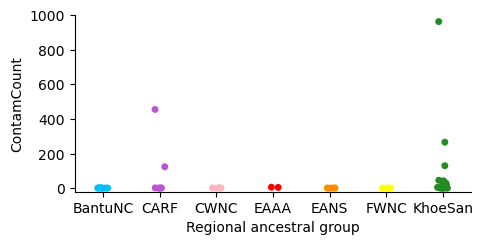

<Figure size 2000x2000 with 0 Axes>

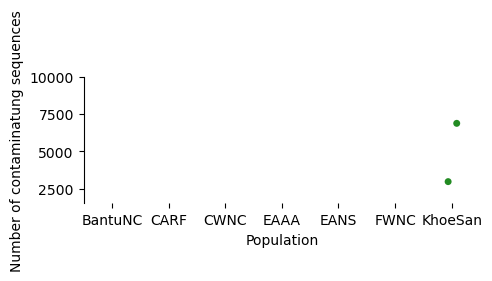

<Figure size 640x480 with 0 Axes>

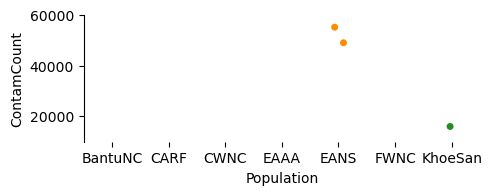

In [32]:
fig = plt.figure(figsize=(20,20))
colors_list = ['deepskyblue', 'mediumorchid', 'lightpink', 'red','darkorange', 'yellow', 'forestgreen']
sns.catplot(x = 'Population', y = 'ContamCount', data = dfFinal, palette=colors_list, height=2.5, aspect=2)
plt.ylim([-20,1000])
plt.xlabel("Regional ancestral group")
plt.savefig('contamBottom.svg', format='svg', dpi=1200)
plt.show()

fig = plt.figure(figsize=(20,20))
colors_list = ['deepskyblue', 'mediumorchid', 'lightpink', 'red','darkorange', 'yellow', 'forestgreen']
sns.catplot(x = 'Population', y = 'ContamCount', data = dfFinal, palette=colors_list, height=2, aspect=2.5)
plt.ylim([1500,10000])
plt.gca().spines['bottom'].set_visible(False)
plt.ylabel("Number of contaminatung sequences")
#plt.savefig('contamMid.svg', format='svg', dpi=1200)
plt.show()

fig = plt.figure()
colors_list = ['deepskyblue', 'mediumorchid', 'lightpink', 'red','darkorange', 'yellow', 'forestgreen']
sns.catplot(x = 'Population', y = 'ContamCount', data = dfFinal, palette=colors_list, height=2, aspect=2.5)
plt.ylim([10000,60000])
plt.gca().spines['bottom'].set_visible(False)
#plt.savefig('contamTop.svg', format='svg', dpi=1200)
plt.show()

### Population non-ref seqs bar graphs

In [ ]:
df = pd.read_excel (r'allPopsQuast.xlsx')
print(df)

In [28]:
# Get the values we're interested in
populations = df["Population"]
contigs = df["# contigs (>= 0 bp)"]
length = df["Total length (Mbp)"].round(decimals = 2)
n50 = df["N50"]

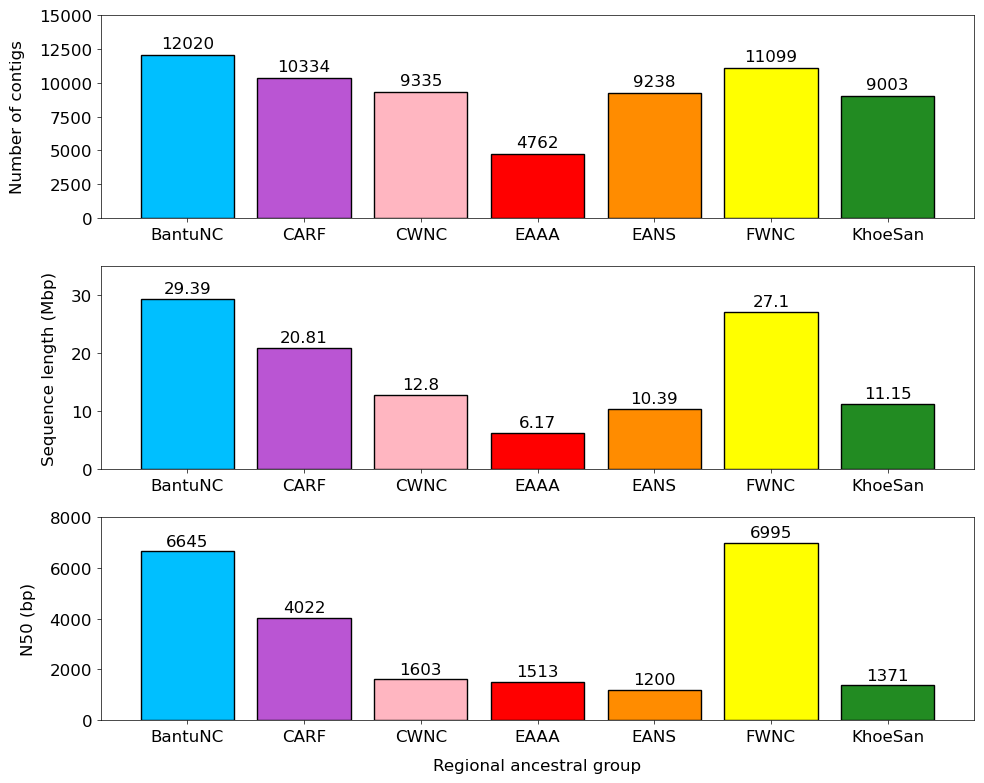

In [38]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10,8))
colors_list = ['deepskyblue', 'mediumorchid', 'lightpink', 'red','darkorange', 'yellow', 'forestgreen']

ax1.bar(populations, contigs, color = colors_list, edgecolor = 'black')
for index, value in enumerate(contigs):
    ax1.text(index, value+300, str(value), horizontalalignment="center", verticalalignment="bottom")
ax2.bar(populations, length, color = colors_list, edgecolor = 'black')
for index, value in enumerate(length):
    ax2.text(index, value+0.5, str(value), horizontalalignment="center", verticalalignment="bottom")
ax3.bar(populations, n50, color = colors_list, edgecolor = 'black')
for index, value in enumerate(n50):
    ax3.text(index, value+100, str(value), horizontalalignment="center", verticalalignment="bottom")
ax3.set(xlabel = 'Regional ancestral group')
ax1.set(ylabel = 'Number of contigs')
ax1.set_ylim(top = 15000)
ax2.set(ylabel = 'Sequence length (Mbp)')
ax2.set_ylim(top = 35)
ax3.set(ylabel = 'N50 (bp)')
ax3.set_ylim(top = 8000)
plt.savefig('allpopsmetrics.svg', format='svg', dpi=1200)
plt.show()

### Repeats

In [65]:
maindir = "/cbio/projects/008/jess/HUPANrun/"
populations = {"AfricanPanGenome/all": 43372280, "BantuNC": 29387157, "CARF": 20810053, "CWNC": 12798033, "EAAA": 6174000, "EANS": 10390604, "FWNC": 27103913, "KhoeSan": 11145301}
file = "/15_genepredmerge/combine.all.maker.gff"

elements = ['SINEalu', 'SINEmir', 'LINEl1', 'LINEl2', 'LINEcr1', 'LTR', 'DNA', 'Satellite', 'Simple_repeat', 'Low_complexity']
df = pd.DataFrame()
dfPerc = pd.DataFrame()

for pop in populations.keys():
    lengths = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0] # same length as the elements array
    gff = os.path.join(maindir, pop + file)
    with open (gff, 'r') as f:
        for line in f:
            if 'repeatmasker' in line and 'match_part' not in line:

                info = line.split('\t') # finding length of repeat by subtracting start from end
                length = int(info[4]) - int(info[3])

                # Doing SINE and LINE elements first, because it's more complicated to find them in the line
                if 'SINE' in line:
                    if 'Alu' in line:
                        lengths[0] += length
                    elif 'MIR' in line:
                        lengths[1] += length

                elif 'LINE' in line:
                    if 'L1' in line:
                        lengths[2] += length
                    elif 'L2' in line:
                        lengths[3] += length
                    elif 'CR1' in line:
                        lengths[4] += length

                # Now doing the rest of the elements
                else:
                    for i in range (5, 10):
                        if elements[i] in line:
                            lengths[i] += length
                            
    #dftemp1 = pd.DataFrame([lengths], columns = elements)
    #dftemp1["Population"] = pop
    #dftemp1["Population"] = dftemp1["Population"].replace(["AfricanPanGenome/all"], "pan-African")
    #df = df.append(dftemp1, ignore_index = True)
    
    for i in range (len(lengths)):
        lengths[i] = (lengths[i]/populations.get(pop))* 100 # getting percentage of each type of repeat in total seqs
    dftemp2 = pd.DataFrame([lengths], columns = elements)
    dftemp2["Population"] = pop
    dftemp2["Population"] = dftemp2["Population"].replace(["AfricanPanGenome/all"], "pan-African")
    dfPerc = dfPerc.append(dftemp2, ignore_index = True)

print (dfPerc)

Empty DataFrame
Columns: []
Index: []
    SINEalu   SINEmir    LINEl1    LINEl2   LINEcr1       LTR       DNA  \
0  4.722934  1.266581  6.982930  1.918032  0.172126  5.193008  2.599393   
1  4.885900  1.239953  6.740866  1.950362  0.190866  5.191407  2.681991   
2  4.129163  0.945303  5.144504  1.483619  0.143623  4.228548  2.642204   
3  5.617762  1.126540  6.400929  1.948198  0.201047  5.086883  1.627945   
4  2.576288  0.459135  2.069420  0.622514  0.098834  1.833997  6.062909   
5  2.374251  0.304833  2.531268  0.355138  0.037842  1.547408  3.526349   
6  5.244313  1.358346  7.044422  2.099132  0.193415  5.606305  2.311021   
7  3.342099  0.807004  4.544965  1.148296  0.103829  3.210707  3.352839   

   Satellite  Simple_repeat  Low_complexity   Population  
0  32.067417      19.769597        0.259184  pan-African  
1  33.154044      19.507287        0.230342      BantuNC  
2  41.173735      20.263014        0.214867         CARF  
3  33.607508      19.203209        0.214049       

In [66]:
# Add GRCh38 repeat percentages to the perc dataframe.
lengths = [10.5, 2.9, 17.5, 3.7, 0.4, 9.2, 3.7, 2.6, 1.5, 0]
dftemp2 = pd.DataFrame([lengths], columns = elements)
dftemp2["Population"] = "GRCh38"
dfPerc = dfPerc.append(dftemp2, ignore_index = True)

print (dfPerc)

     SINEalu   SINEmir     LINEl1    LINEl2   LINEcr1       LTR       DNA  \
0   4.722934  1.266581   6.982930  1.918032  0.172126  5.193008  2.599393   
1   4.885900  1.239953   6.740866  1.950362  0.190866  5.191407  2.681991   
2   4.129163  0.945303   5.144504  1.483619  0.143623  4.228548  2.642204   
3   5.617762  1.126540   6.400929  1.948198  0.201047  5.086883  1.627945   
4   2.576288  0.459135   2.069420  0.622514  0.098834  1.833997  6.062909   
5   2.374251  0.304833   2.531268  0.355138  0.037842  1.547408  3.526349   
6   5.244313  1.358346   7.044422  2.099132  0.193415  5.606305  2.311021   
7   3.342099  0.807004   4.544965  1.148296  0.103829  3.210707  3.352839   
8  10.500000  2.900000  17.500000  3.700000  0.400000  9.200000  3.700000   

   Satellite  Simple_repeat  Low_complexity   Population  
0  32.067417      19.769597        0.259184  pan-African  
1  33.154044      19.507287        0.230342      BantuNC  
2  41.173735      20.263014        0.214867         

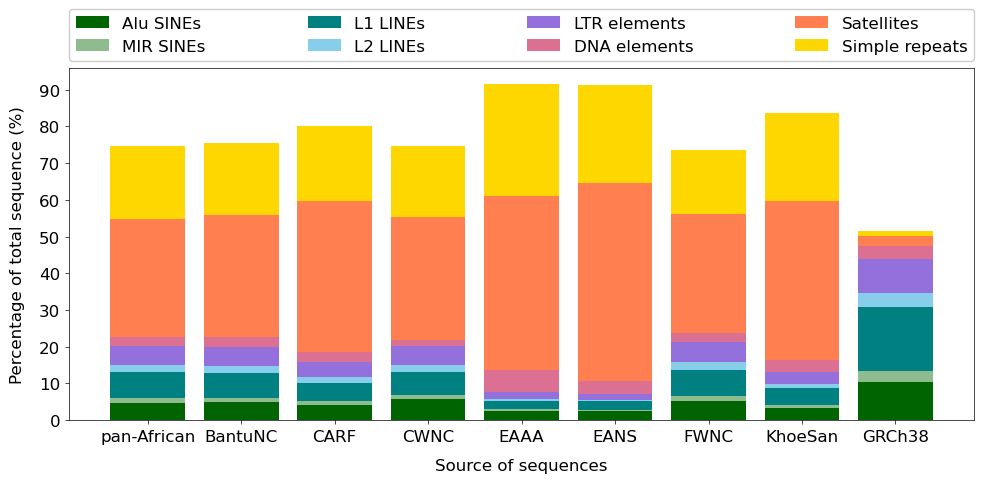

In [100]:
x = dfPerc["Population"]
alu = dfPerc["SINEalu"]
mir = dfPerc["SINEmir"]
l1 = dfPerc["LINEl1"]
l2 = dfPerc["LINEl2"]
ltr = dfPerc["LTR"]
dna = dfPerc["DNA"]
sat = dfPerc["Satellite"]
simp = dfPerc["Simple_repeat"]

plt.figure(figsize=(10,5))
plt.bar(x, alu, color='darkgreen', label='Alu SINEs', )
plt.bar(x, mir, bottom=alu, color='darkseagreen', label='MIR SINEs')
plt.bar(x, l1, bottom=alu+mir, color='teal', label='L1 LINEs')
plt.bar(x, l2, bottom=alu+mir+l1, color='skyblue', label='L2 LINEs')
plt.bar(x, ltr, bottom=alu+mir+l1+l2, color='mediumpurple', label='LTR elements')
plt.bar(x, dna, bottom=alu+mir+l1+l2+ltr, color='palevioletred', label='DNA elements')
plt.bar(x, sat, bottom=alu+mir+l1+l2+ltr+dna, color='coral', label='Satellites')
plt.bar(x, simp, bottom=alu+mir+l1+l2+ltr+dna+sat, color='gold', label='Simple repeats')

plt.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", mode="expand", borderaxespad=0, ncol=4)
plt.xlabel("Source of sequences")
plt.ylabel("Percentage of total sequence (%)")
plt.yticks(range(0, 100, 10))
#plt.savefig('repeats.svg', format='svg', dpi=1200)

### PAV plots

In [128]:
# Get list of populations and samples

file = open('ALLSAMPLES.csv', encoding = 'utf-8')
csv_metadata = csv.reader(file, delimiter = ',')
sampledata = list(csv_metadata)
    
BantuNC = []
CARF = []
CWNC = []
EAAA = []
EANS = []
FWNC = []
KhoeSan = []

for sample in sampledata[1:]:
    sampleid = sample[0].split(";")[0]
    population = sample[0].split(";")[5]
    if population == "BantuNC":
        BantuNC.append(sampleid)
    elif population == "CARF":
        CARF.append(sampleid)
    elif population == "CWNC":
        CWNC.append(sampleid)
    elif population == "EAAA":
        EAAA.append(sampleid)
    elif population == "EANS":
        EANS.append(sampleid)
    elif population == "FWNC":
        FWNC.append(sampleid)
    elif population == "KhoeSan":
        KhoeSan.append(sampleid)

poplist = [BantuNC, CARF, CWNC, EAAA, EANS, FWNC, KhoeSan]

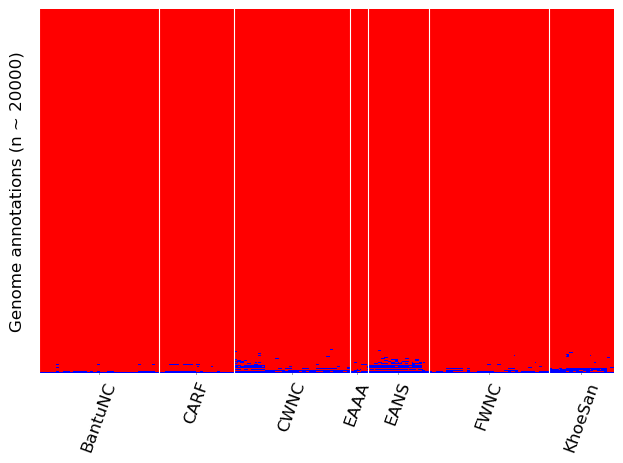

In [100]:
# Showing gene PAV of all 20 000 genes
genearray = []
for line in open ("/cbio/projects/008/jess/HUPANrun/AfricanPanGenome/all/21_geneExist/gene85.gene.exist", 'r'):
    if line.startswith("Gene"):
        names = []
        namesparts = line.split("\t")
        for sample in namesparts[1:]:
            names.append(sample.strip())
    else: # skipping first line
        pav = []
        parts = line.split("\t")
        for value in parts[1:]:
            pav.append(int(value.strip()))
        genearray.append(pav)
        
# Unordered plot:
df = pd.DataFrame(data=genearray, columns=names)

# Going to order them based on population
orderednames = []
orderedgenes = np.zeros_like(genearray) # now have an empty array the same exact size/shape as the gene one

count = -1
for pop in poplist:
    for sample in pop:
        if sample in names:
            count += 1
            orderednames.append(sample)
            index = names.index(sample)
            for i in range(len(genearray)):
                orderedgenes[i][count] = genearray[i][index]
                
finalorderedgenes = []
for array in orderedgenes:
    lst = array.tolist()
    lst.append(lst.count(0)) # adding count of absence
    finalorderedgenes.append(lst)
        
# Ordered plot:
orderednames.append('ZeroCounter') # adding count of absence
dftemp = pd.DataFrame(data=finalorderedgenes, columns=orderednames)
df2 = dftemp.sort_values(by = 'ZeroCounter')
df2.drop('ZeroCounter', inplace=True, axis=1)

numinpops = [0, 35, 57, 91, 96, 114, 149] # starting position of each population along the X axis

plt.figure()
hm2 = sns.heatmap(df2, vmin=0, vmax=1, cbar=False, cmap="bwr", xticklabels=False, yticklabels=False)
hm2.set_xticks(numinpops)
hm2.grid(axis='x', color='white')
hm2.set_xticks([17.5, 46, 74, 93, 105, 131.5, 158.5], minor=True)
hm2.set_xticklabels(['BantuNC', 'CARF', 'CWNC', 'EAAA', 'EANS', 'FWNC', 'KhoeSan'], minor=True, rotation=70)
hm2.tick_params(axis='x', colors='white')
plt.ylabel("Genome annotations (n ~ 20000)")
plt.show()

1424


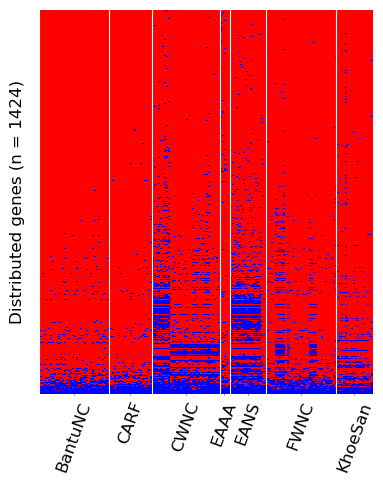

In [131]:
# Now showing gene PAV of only the distributed genes 

genearray = []
for line in open ("/cbio/projects/008/jess/HUPANrun/AfricanPanGenome/all/21_geneExist/both85.gene.exist", 'r'):
    if line.startswith("Gene"):
        names = []
        namesparts = line.split("\t")
        for sample in namesparts[1:]:
            names.append(sample.strip())
    else: # skipping first line
        pav = []
        parts = line.split("\t")
        if "0" in parts[1:]:
            for value in parts[1:]:
                pav.append(int(value.strip()))
            genearray.append(pav)

print (len(genearray))

# Going to order them based on population
orderednames = []
orderedgenes = np.zeros_like(genearray) # now have an empty array the same exact size/shape and the gene one

count = -1
for pop in poplist:
    for sample in pop:
        if sample in names:
            count += 1
            orderednames.append(sample)
            index = names.index(sample)
            for i in range(len(genearray)):
                orderedgenes[i][count] = genearray[i][index]

finalorderedgenes = []
for array in orderedgenes:
    lst = array.tolist()
    lst.append(lst.count(0)) # adding count of absence
    finalorderedgenes.append(lst)
        
# Ordered plot:
orderednames.append('ZeroCounter') # adding count of absence
dftemp = pd.DataFrame(data=finalorderedgenes, columns=orderednames)
df3 = dftemp.sort_values(by = 'ZeroCounter')
df3.drop('ZeroCounter', inplace=True, axis=1)               
                
numinpops = [0, 35, 57, 91, 96, 114, 149] # starting position of each population along the X axis

plt.figure(figsize=(4, 5))
hm3 = sns.heatmap(df3, vmin=0, vmax=1, cbar=False, cmap="bwr", xticklabels=False, yticklabels=False)
hm3.set_xticks(numinpops)
hm3.grid(axis='x', color='white')
hm3.set_xticks([17.5, 46, 74, 93, 105, 131.5, 158.5], minor=True)
hm3.set_xticklabels(['BantuNC', 'CARF', 'CWNC', 'EAAA', 'EANS', 'FWNC', 'KhoeSan'], minor=True, rotation=70)
hm3.tick_params(axis='x', colors='white')
plt.ylabel(f"Distributed genes (n = {len(genearray)})")
plt.savefig('PAV85both.png', format='png', dpi=1200)
plt.show()

### Gene PAV based on dataset

In [139]:
# Get list of samples and datasets

file = open('ALLSAMPLES.csv', encoding = 'utf-8')
csv_metadata = csv.reader(file, delimiter = ',')
sampledata = list(csv_metadata)
    
kGP = []
HGDP = []
SGDP = []
H3A = []
Tryp = []
EHC = []
KSP = []

for sample in sampledata[1:]:
    sampleid = sample[0].split(";")[0]
    population = sample[0].split(";")[7]
    if population == "1kGP":
        kGP.append(sampleid)
    elif population == "HGDP":
        HGDP.append(sampleid)
    elif population == "SGDP":
        SGDP.append(sampleid)
    elif population == "H3A":
        H3A.append(sampleid)
    elif population == "TrypanoGEN":
        Tryp.append(sampleid)
    elif population == "EHC":
        EHC.append(sampleid)
    elif population == "KSP":
        KSP.append(sampleid)

poplist = [kGP, HGDP, SGDP, H3A, Tryp, EHC, KSP]
counter = 0
for i in poplist:
    print (len(i))
    counter += len(i)

33
51
24
35
78
5
25
251


1292


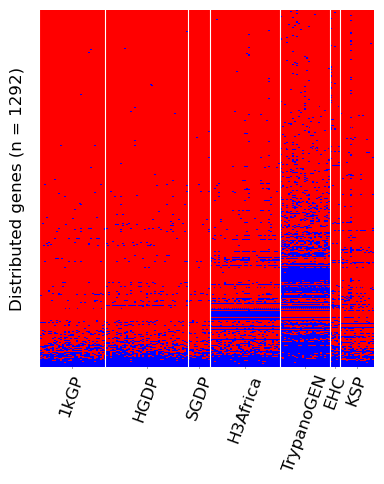

In [141]:
# Now showing gene PAV of only the distributed genes 

genearray = []
for line in open ("/cbio/projects/008/jess/HUPANrun/AfricanPanGenome/all/21_geneExist/gene90.gene.exist", 'r'):
    if line.startswith("Gene"):
        names = []
        namesparts = line.split("\t")
        for sample in namesparts[1:]:
            names.append(sample.strip())
    else: # skipping first line
        pav = []
        parts = line.split("\t")
        if "0" in parts[1:]:
            for value in parts[1:]:
                pav.append(int(value.strip()))
            genearray.append(pav)

print (len(genearray))

# Going to order them based on population
orderednames = []
orderedgenes = np.zeros_like(genearray) # now have an empty array the same exact size/shape and the gene one

count = -1
for pop in poplist:
    for sample in pop:
        if sample in names:
            count += 1
            orderednames.append(sample)
            index = names.index(sample)
            for i in range(len(genearray)):
                orderedgenes[i][count] = genearray[i][index]

finalorderedgenes = []
for array in orderedgenes:
    lst = array.tolist()
    lst.append(lst.count(0)) # adding count of absence
    finalorderedgenes.append(lst)
        
# Ordered plot:
orderednames.append('ZeroCounter') # adding count of absence
dftemp = pd.DataFrame(data=finalorderedgenes, columns=orderednames)
df4 = dftemp.sort_values(by = 'ZeroCounter')
df4.drop('ZeroCounter', inplace=True, axis=1)               
                
numinpops = [0, 33, 75, 86, 121, 146, 151] # starting position of each population along the X axis

plt.figure(figsize=(4, 5))
hm4 = sns.heatmap(df4, vmin=0, vmax=1, cbar=False, cmap="bwr", xticklabels=False, yticklabels=False)
hm4.set_xticks(numinpops)
hm4.grid(axis='x', color='white')
hm4.set_xticks([16.5, 54, 80.5, 103.5, 133.5, 148.5, 159.5], minor=True)
hm4.set_xticklabels(['1kGP', 'HGDP', 'SGDP', 'H3Africa', 'TrypanoGEN', 'EHC', 'KSP'], minor=True, rotation=70)
hm4.tick_params(axis='x', colors='white')
plt.ylabel(f"Distributed genes (n = {len(genearray)})")
plt.savefig('PAVdatasets.png', format='png', dpi=1200)
plt.show()

### Core genes plot

In [123]:
# Going to assign each sample an ID from 1 - 168, then use the number of core genes as y value.

samplearray = []
presencearray = []
for i in range (1, 169):
    samplearray.append(i)
    presencearray.append(0)

genearray = []
for line in open ("/cbio/projects/008/jess/HUPANrun/AfricanPanGenome/all/21_geneExist/gene90.gene.exist", 'r'):
    if line.startswith("Gene"):
        continue # skipping first line
    else:
        pav = []
        parts = line.split("\t")
        for value in parts[1:]:
            pav.append(int(value.strip()))
        genearray.append(pav)
        
for array in genearray:
    for x in range (len(array)):
        if array[x] == 1:
            presencearray[x] += 1

In [127]:
presencearray.sort()
print (presencearray)
print (sum(presencearray)/len(presencearray))

[19472, 19476, 19478, 19511, 19518, 19518, 19519, 19537, 19538, 19538, 19541, 19541, 19542, 19543, 19557, 19558, 19559, 19559, 19560, 19562, 19562, 19566, 19567, 19575, 19597, 19616, 19677, 19687, 19700, 19722, 19726, 19728, 19734, 19738, 19740, 19740, 19742, 19742, 19743, 19745, 19747, 19748, 19750, 19751, 19754, 19754, 19755, 19755, 19757, 19759, 19760, 19761, 19761, 19764, 19765, 19765, 19765, 19766, 19768, 19769, 19771, 19772, 19772, 19779, 19781, 19781, 19786, 19788, 19791, 19793, 19801, 19803, 19805, 19805, 19807, 19807, 19808, 19808, 19809, 19810, 19811, 19813, 19814, 19815, 19815, 19816, 19817, 19817, 19818, 19818, 19818, 19819, 19819, 19819, 19820, 19820, 19820, 19820, 19821, 19822, 19822, 19822, 19822, 19822, 19823, 19824, 19824, 19824, 19824, 19825, 19825, 19826, 19826, 19826, 19827, 19827, 19828, 19829, 19829, 19829, 19829, 19829, 19829, 19829, 19830, 19831, 19831, 19831, 19831, 19832, 19833, 19833, 19833, 19834, 19835, 19835, 19836, 19836, 19836, 19836, 19838, 19838, 19839

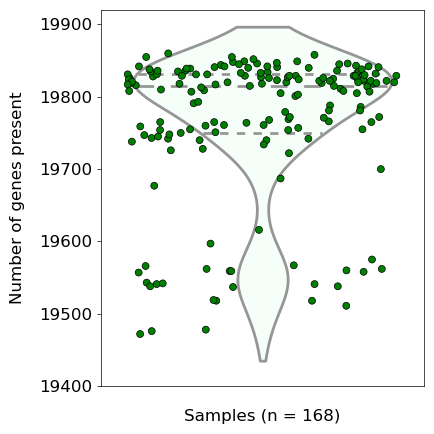

In [120]:
plt.figure(figsize = (4.5,4.5))
violin = sns.violinplot(y= presencearray, color = 'mintcream', inner="quartile", linewidth = 2, cut = 1)
violin = sns.stripplot(y = presencearray, jitter = 0.425, color = 'green', edgecolor = 'black', linewidth = 0.5)
violin.tick_params(axis='x', colors='white')

yticks = []
for i in range (19400, 19950, 100):
    yticks.append(i)
plt.yticks(yticks)
plt.xlabel("Samples (n = 168)")
plt.ylabel("Number of genes present")
#plt.savefig('sampleGenes.svg', format='svg', dpi=1200)
plt.show()